#  Load libraries

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Importing the Dataset

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week10-desicion-tree/PlayTennis.csv")
df

,Day,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


# Data Analysis

In [ ]:
df.shape  #To see the number of rows and columns in our dataset:

(14, 6)

# Preparing the Data (Data Slicing)

In [ ]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder() #encode your data

df=df.apply(string_to_int.fit_transform) #fit and transform it
df.drop("Day", axis=1, inplace=True)
df

,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [ ]:
#To divide our data into attribute set and Label:
feature_cols = df.columns
X = df.loc[:, df.columns != 'Play_Tennis']  #contains the attribute
y = df.Play_Tennis                                  #contains the label

In [ ]:
#Experiment1
#X = X.iloc[:,0]
#X = X.to_frame()
#X.head()

In [ ]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=345)

In [ ]:
#if len(X_train.shape) == 1:
#  X_train = np.reshape(X_train, (-1,1))
#  X_test = np.reshape(X_test, (-1,1))

In [ ]:
X_train.shape

(9, 4)

# Training and Making Predictions

In [ ]:
# perform training
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


- Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [ ]:
data_p = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
13,0,0
9,1,1
0,0,1
12,1,1
8,1,1


# Evaluating the Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 1]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



# Visualizing Decision Trees

In [ ]:
#!pip install pip install pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
X_train.head(9)
y_train.head(9)
#string_to_int.inverse_transform(X_train.iloc[:,0])

,Play_Tennis
4,1
1,0
3,1
11,1
6,1
2,1
5,0
7,0
10,1


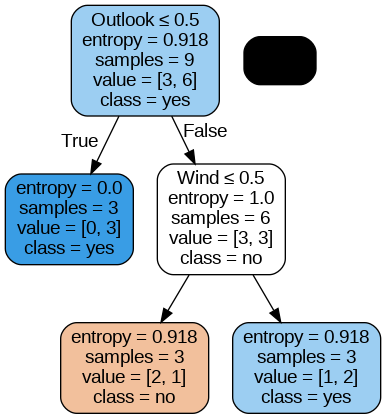

In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =X.columns ,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('playtennis.png')
Image(graph.create_png())

1. Apply random forest, xgboost, catboot algorithm to the play tennis dataset.

*********************HW-25-10*****************************************


1.   Apply Random Forest ,xgboots,catboot to the play  tennis data set.




In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix

# Random Forest

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rdf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rdf_model.fit(X_train, y_train)
rdf_pred = rdf_model.predict(X_test)
rdf_accuracy = accuracy_score(y_test, rdf_pred)

In [ ]:
rdf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


print('Classification Report:')
print(classification_report(y_test, y_pred))


print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.4
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.67      0.57         3

    accuracy                           0.40         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.30      0.40      0.34         5

Confusion Matrix:
[[0 2]
 [1 2]]


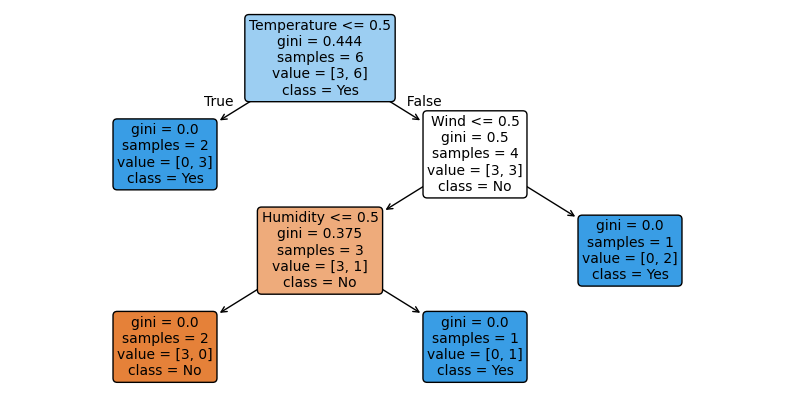

In [ ]:
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extracting a single tree from the Random Forest model
estimator = rdf_model.estimators_[0]

# Visualizing the tree
plt.figure(figsize=(10,5))
plot_tree(estimator, feature_names=X.columns, filled=True, rounded=True, class_names=['No', 'Yes'], fontsize=10)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  XGBoost

In [ ]:

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[0 2]
 [0 3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:24:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:24:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
best_params = grid_search.best_params_


best_model = XGBClassifier(**best_params,
                           use_label_encoder=False,
                           eval_metric='logloss',
                           random_state=42)

best_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:24:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = best_model.predict(X_test)


# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Parameters: {accuracy}')


print('Classification Report with Best Parameters:')
print(classification_report(y_test, y_pred))


print('Confusion Matrix with Best Parameters:')
print(confusion_matrix(y_test, y_pred))

Accuracy with Best Parameters: 0.6
Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5

Confusion Matrix with Best Parameters:
[[0 2]
 [0 3]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CATBOOST

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Create an empty dictionary to store results
results = {}

catboost_model = CatBoostClassifier(silent=True, random_state=42)
catboost_model.fit(X_train, y_train)
catboost_pred = catboost_model.predict(X_test)
results['CatBoost'] = accuracy_score(y_test, catboost_pred)
results['CatBoost']

0.6

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, catboost_pred))
print(classification_report(y_test, catboost_pred))

[[1 1]
 [1 2]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [ ]:
from catboost import CatBoostClassifier

# Define the hyperparameters to search over for CatBoost
param_grid_catboost = {
    'iterations': [100, 200, 500],          # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'depth': [3, 5, 7],                     # Maximum depth of trees
    'l2_leaf_reg': [1, 3, 5],               # L2 regularization term on weights
    'bagging_temperature': [0.5, 1.0, 1.5]  # Bagging temperature
}

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(silent=True, random_state=42)

# Set up GridSearchCV with the model and parameter grid
grid_search_catboost = GridSearchCV(estimator=catboost_model, param_grid=param_grid_catboost,
                                    cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_catboost.fit(X_train, y_train)

# Get the best parameters and use them to predict
best_catboost_model = grid_search_catboost.best_estimator_
catboost_pred = best_catboost_model.predict(X_test)

# Evaluate accuracy with the best parameters
results['CatBoost_Tuned'] = accuracy_score(y_test, catboost_pred)

# Output the best parameters
print(f"Best parameters for CatBoost: {grid_search_catboost.best_params_}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for CatBoost: {'bagging_temperature': 0.5, 'depth': 3, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.2}


In [ ]:
results['CatBoost_Tuned']

0.6